# Walkthroughs and Exercises for *Fundamentals of Statistics with Python*

Dr. Chester Ismay

In [ ]:
# Install the packages directly if needed with pip
# Check the repo's README below for more information
!pip install numpy pandas scipy matplotlib seaborn statsmodels scikit-learn jupyter

In [3]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Week 1

## Walkthrough 1.1: Getting Started

### Setting Up the Python Environment

If you haven’t already installed Python, Jupyter, and the necessary
packages, there are instructions on the course repo in the README to do
so
[here](https://github.com/ismayc/oreilly-fundamentals-of-statistics-with-python/blob/main/README.md).

If you aren’t able to do this on your machine, you may want to check out
[Google Colab](https://colab.research.google.com/). It’s a free service
that allows you to run Jupyter notebooks in the cloud. Alternatively,
I’ve set up some temporary notebooks on Binder
[here](https://mybinder.org/v2/gh/ismayc/oreilly-fundamentals-of-statistics-with-python/main?urlpath=%2Fdoc%2Ftree%2Fexercises.ipynb)
that you can work with online as well.

In [4]:
# Importing libraries/modules and aliasing them as needed
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Exploring a dataset

In [5]:
# Load in the dataset
data_dev_survey = pd.read_csv("data_dev_survey.csv")

In [6]:
# Display information about the DataFrame
data_dev_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   response_id                 1183 non-null   int64  
 1   work_as_dev                 1183 non-null   object 
 2   age                         1183 non-null   object 
 3   employment                  1183 non-null   object 
 4   remote_work                 1183 non-null   object 
 5   coding_activities           1182 non-null   object 
 6   ed_level                    1183 non-null   object 
 7   dev_type                    1183 non-null   object 
 8   years_code                  1182 non-null   float64
 9   years_code_pro              1183 non-null   int64  
 10  org_size                    1183 non-null   object 
 11  country                     1183 non-null   object 
 12  language_have_worked_with   1183 non-null   object 
 13  language_want_to_work_with  1116 

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [7]:
# Calculate the mean of the years_code_pro column
np.mean(data_dev_survey['years_code_pro'])

np.float64(7.961115807269653)

In [8]:
# Calculate the median of the work_exp column
np.median(data_dev_survey['work_exp'])

np.float64(7.0)

In [9]:
# Calculate the standard deviation of the converted_comp_yearly column
np.std(data_dev_survey['converted_comp_yearly'])

np.float64(81861.24268446874)

#### Using Pandas

In [10]:
# Display summary statistics on the numeric columns of the DataFrame
data_dev_survey.describe()

,response_id,years_code,years_code_pro,work_exp,converted_comp_yearly
count,1183.000000,1182.000000,1183.000000,1183.000000,1.183000e+03
mean,43949.774303,12.534687,7.961116,9.650042,9.068442e+04
std,25327.979423,8.384094,7.153751,8.189750,8.189586e+04
min,164.000000,1.000000,0.000000,0.000000,3.000000e+00
25%,22733.000000,7.000000,3.000000,4.000000,4.159300e+04
50%,43305.000000,10.000000,6.000000,7.000000,7.271400e+04
75%,65791.000000,16.000000,10.000000,13.000000,1.200000e+05
max,89072.000000,50.000000,50.000000,48.000000,1.200000e+06


#### Using SciPy

In [11]:
# Separate the data into two groups
using_ai = data_dev_survey\
    [data_dev_survey['plans_to_use_ai'] == 'Using']\
    ['converted_comp_yearly']

plan_to_use_ai = data_dev_survey\
    [data_dev_survey['plans_to_use_ai'] == 'Plan to use']\
    ['converted_comp_yearly']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(using_ai, plan_to_use_ai, equal_var=False)

# Print the results
t_stat
p_value

np.float64(0.9293366153676751)

np.float64(0.3529304815725288)

## Exercise 1.1: Getting Started

### Setting Up the Python Environment

If you ran the `# Importing libraries and aliasing them` code above, you
should be good to proceed here. If not, scroll up and run it.

### Exploring a dataset

In [ ]:
# Load in the coffee_quality dataset

In [ ]:
# Display information about the DataFrame

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [ ]:
# Calculate the mean of the aroma column

In [ ]:
# Calculate the median of the total_cup_points column

In [ ]:
# Calculate the standard deviation of the moisture_percentage column

#### Using Pandas

In [ ]:
# Display summary statistics on the numeric columns of the DataFrame

#### Using SciPy

In [ ]:
# Focus on only Asia and North America entries

# Separate the data into two groups


# Perform the t-test


# Print the results


------------------------------------------------------------------------

## Walkthrough 1.2: Data Summarizing

### Compute and interpret measures of central tendency

In [13]:
# Calculate center statistics for years_code_pro
data_dev_survey['years_code_pro'].mean()
data_dev_survey['years_code_pro'].median()
data_dev_survey['years_code_pro'].mode()

# To extract just the value for mode
data_dev_survey['years_code_pro'].mode()[0]

np.float64(7.961115807269653)

np.float64(6.0)

0    2
Name: years_code_pro, dtype: int64

np.int64(2)

### Compute and interpret measures of variation

In [15]:
# Calculate spread statistics for years_code_pro
range_years_code_pro = data_dev_survey['years_code_pro'].max() \
    - data_dev_survey['years_code_pro'].min()
range_years_code_pro

np.int64(50)

In [16]:
data_dev_survey['years_code_pro'].var(ddof=1) # Sample variance
data_dev_survey['years_code_pro'].std(ddof=1) # Sample standard deviation

np.float64(51.17615171500372)

np.float64(7.153750884326607)

In [18]:
# Calculate the five-number summary for 'years_code_pro'
data_dev_survey['years_code_pro'].describe()

# Print them out

count    1183.000000
mean        7.961116
std         7.153751
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        50.000000
Name: years_code_pro, dtype: float64

## Exercise 1.2: Data Summarizing

In [ ]:
# Calculate center statistics for 'aroma'

In [ ]:
# Calculate spread statistics for 'aroma'

In [ ]:
# Calculate the five-number summary for 'aroma'

------------------------------------------------------------------------

## Walkthrough 1.3: Cleaning and Preparing Data with Pandas

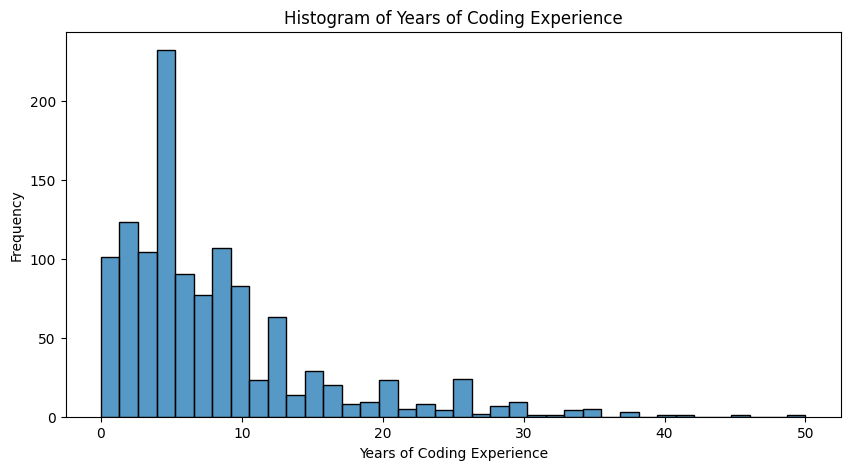

In [23]:
# Histogram for years_code_pro
plt.figure(figsize=(10, 5));
sns.histplot(data_dev_survey['years_code_pro']);
plt.title('Histogram of Years of Coding Experience');
plt.xlabel('Years of Coding Experience');
plt.ylabel('Frequency');
plt.show();

In [24]:
# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 5)

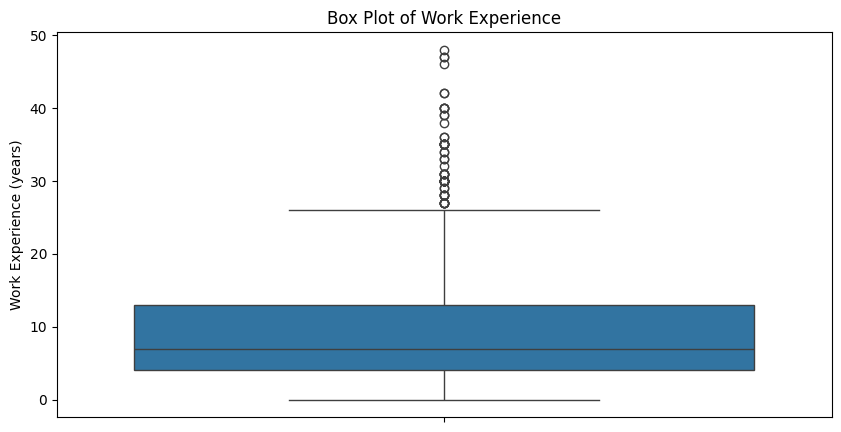

In [26]:
# Box plot for work_exp
sns.boxplot(y=data_dev_survey['work_exp']);
plt.title('Box Plot of Work Experience');
plt.ylabel('Work Experience (years)');
plt.show();

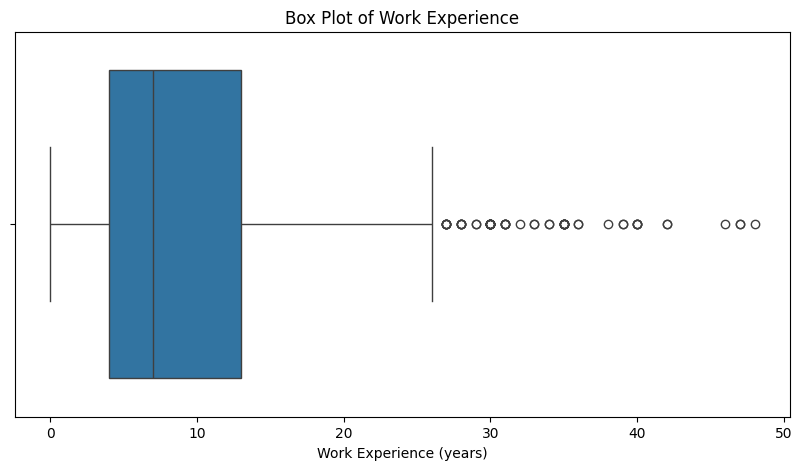

In [29]:
# Box plot for work_exp (horizontal version)
sns.boxplot(x=data_dev_survey['work_exp'])
plt.title('Box Plot of Work Experience')
plt.xlabel('Work Experience (years)')
plt.show();

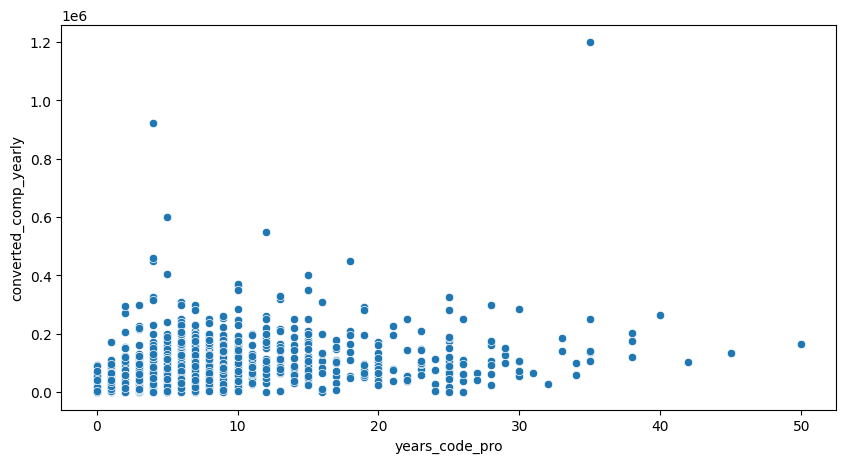

In [31]:
# Scatter plot for years_code_pro vs. converted_comp_yearly
sns.scatterplot(x=data_dev_survey['years_code_pro'],
                y=data_dev_survey['converted_comp_yearly'])
plt.show();

In [30]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

## Exercise 1.3: Cleaning and Preparing Data with Pandas

In [ ]:
# Histogram for acidity

In [ ]:
# Box plot for body

In [ ]:
# Scatter plot for body vs. acidity

In [32]:
sns.set_style("darkgrid")

------------------------------------------------------------------------

## Walkthrough 1.4: Sampling Distribution Generation

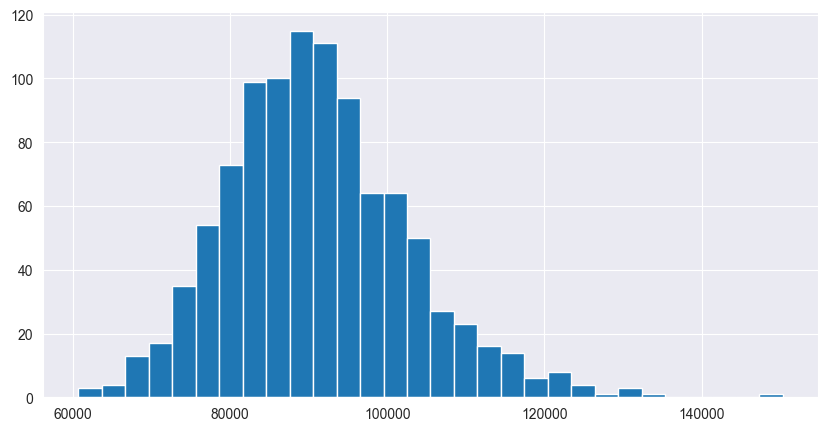

In [35]:
# Think of our data as a population to draw from
population = data_dev_survey['converted_comp_yearly'].dropna().values

# Generate a large sample from the 'converted_comp_yearly' column
# Parameters
sample_size = 50
num_samples = 1000

# Set a seed to make code reproducible
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    # Create a sample from the population
    sample = np.random.choice(population, sample_size)
    # Calculate sample mean and add to list
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.hist(sample_means, bins=30);

## Exercise 1.4: Sampling Distribution Generation

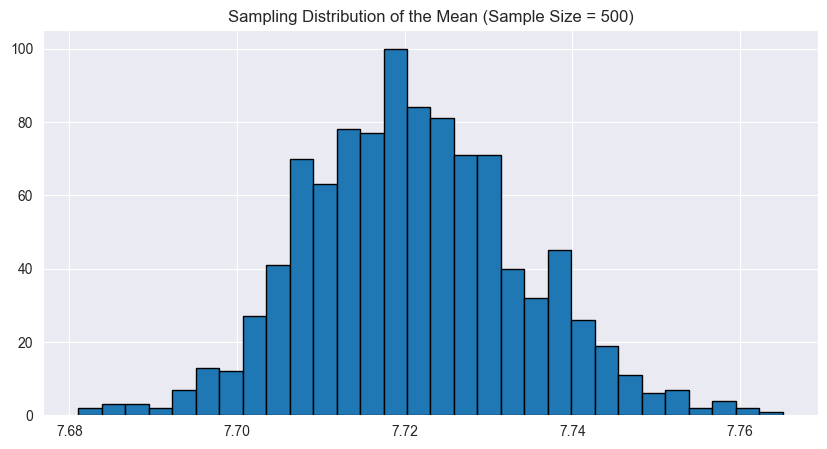

In [41]:
coffee_quality = pd.read_csv("coffee_quality.csv")

# Think of our aroma data as a population to draw from
population = coffee_quality['aroma'].dropna().values

# Parameters
sample_size = 500
num_samples = 1000

# Set a seed to make code reproducible
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    # Create a sample from the population
    sample = np.random.choice(population, sample_size)
    # Calculate sample mean and add to list
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.hist(sample_means, bins=30, edgecolor='black');
plt.title("Sampling Distribution of the Mean (Sample Size = 500)");
plt.show();

------------------------------------------------------------------------

# Week 2

## Walkthrough 2.1: Advanced Plots

In [ ]:
# Select only numeric columns

# Calculate the correlation matrix for numeric columns

# Heatmap for correlation matrix

In [ ]:
# Pair plot for selected variables 'years_code_pro', 'work_exp', 'converted_comp_yearly'

In [ ]:
# Time series plot


# Count the number of surveys completed each day

# Plot the counts as a line chart

## Exercise 2.1: Advanced Plots

In [ ]:
# Select only numeric columns

# Drop the 'clean_cup' and 'sweetness' columns since they are always 10
numeric_columns = numeric_columns.drop(columns=['clean_cup', 'sweetness'], errors='ignore')

# Calculate the correlation matrix for numeric columns


# Heatmap for correlation matrix

In [ ]:
# Pair plot for selected variables ['aroma', 'acidity', 'body']

In [ ]:
# Plot the mean total_cup_points for each grading_date

# Convert to datetime

# Extract the month and year from the grading_date column
coffee_quality['month'] = coffee_quality['grading_date'].dt.to_period('M')

# Aggregate the mean total_cup_points by month

# Plot the mean total_cup_points by month as a line chart

------------------------------------------------------------------------

## Walkthrough 2.2: EDA

### Data Cleaning

In [ ]:
# Check for missing values


# Remove duplicates if any

### Data Visualization

In [ ]:
# Histogram for years_code_pro


# Box plot for work_exp


# Scatter plot for years_code_pro vs. converted_comp_yearly

### Summary Statistics

In [ ]:
# Calculate summary statistics

## Exercise 2.2: EDA

### Data Cleaning

In [ ]:
# Check for missing values


# Remove duplicates if any

### Data Visualization

In [ ]:
# Histogram for aroma


# Box plot for acidity


# Scatter plot for aroma vs. total_cup_points

### Summary Statistics

In [ ]:
# Calculate summary statistics

------------------------------------------------------------------------

## Walkthrough 2.3: Data Preprocessing

### Inspect the Data after Loading

In [ ]:
# Display basic information about the dataset


# Display the first few rows of the dataset

### Handle Missing Values

In [ ]:
# Check for missing values


# Make a copy of the dataset for imputation

# Select only numeric columns

# Fill missing values in numeric columns with the median


# Display the first few rows of the imputed dataset

### Handling Outliers

In [ ]:
# Select only numeric columns

# Identify outliers using IQR


# Remove outliers

### Data Transformation

In [ ]:
# Normalization on converted_comp_yearly


# Standardization on work_exp


# Encoding categorical variables (country)

### Data Visualizations on Preprocessed Data

In [ ]:
# Histogram for years_code_pro


# Box plot for work_exp


# Scatter plot for years_code_pro vs. converted_comp_yearly

## Exercise 2.3: Data Preprocessing

### Inspect the Data after Loading

In [ ]:
# Display basic information about the dataset


# Display the first few rows of the dataset

### Handle Missing Values

In [ ]:
# Check for missing values


# Make a copy of the dataset for imputation


# Select only numeric columns


# Fill missing values in numeric columns with the median


# Display the first few rows of the imputed dataset

### Handle Outliers

In [ ]:
# Select only numeric columns

# Identify outliers using IQR


# Remove outliers

### Data Transformation

In [ ]:
# Normalization on total_cup_points


# Standardization on acidity


# Encoding categorical variables (country and continent of origin)

### Data Visualizations on Preprocessed Data

In [ ]:
# Histogram for aroma


# Box plot for acidity


# Scatter plot for aroma vs. total_cup_points

------------------------------------------------------------------------

## Walkthrough 2.4: Correlations

### Correlation Matrix

In [ ]:
# Select only numeric columns

# Calculate the correlation matrix

# Display the correlation matrix

### Visualize Correlations

In [ ]:
# Heatmap for correlation matrix

### Create Scatter Plots for Meaningful Correlations

In [ ]:
# Scatter plot for years_code_pro vs. years_code


# Scatter plot for work_exp vs. years_code_pro

## Exercise 2.4: Correlations

### Correlation Matrix

In [ ]:
# Select only numeric columns

# Remove clean_cup and sweetness too

# Calculate the correlation matrix

# Display the correlation matrix

### Visualize Correlations

In [ ]:
# Heatmap for correlation matrix

### Create Scatter Plots for Meaningful Correlations

In [ ]:
# Scatter plot for flavor vs. total_cup_points


# Scatter plot for overall vs. total_cup_points

------------------------------------------------------------------------

# Week 3

## Walkthrough 3.1: Simulating Distributions

### Simulating Binomial

In [ ]:
# Simulate binomial distribution

# Plot histogram

### Simulating Normal

In [ ]:
# Simulate normal distribution

# Plot histogram

## Exercise 3.1:

### Simulating Poisson

In [ ]:
# Simulate Poisson distribution with lambda (lam) parameter 3

# Plot histogram

### Simulating Exponential

In [ ]:
# Simulate exponential distribution with scale parameter 1

# Plot histogram

------------------------------------------------------------------------

## Walkthrough 3.2: t-tests

In [ ]:
# One-sample t-test checking for evidence that mu compensation > 85000

In [ ]:
# Two-sample t-test comparing compensation across plans_to_use_ai groups
# Checking for a difference

## Exercise 3.2: t-tests

In [ ]:
# One-sample t-test checking for evidence that mu flavor < 7.8

In [ ]:
# Two-sample t-test checking for difference in Columbia and Brazil total_cup_points

------------------------------------------------------------------------

## Walkthrough 3.3: Comparative Tests

In [ ]:
# Perform one-way ANOVA comparing compensation across different levels of
# remote_work

In [ ]:
# Create a contingency table of employment and remote_work


# Perform chi-square test

## Exercise 3.3: Comparative Tests

In [ ]:
# Perform one-way ANOVA comparing total_cup_points across country_of_origin

In [ ]:
# Perform a chi-square test of independence for processing_method versus
# continent_of_origin

# Create a contingency table


# Perform chi-square test

------------------------------------------------------------------------

## Walkthrough 3.4: Non-Parametric Tests

In [ ]:
# Perform Mann-Whitney U Test comparing compensation for Remote and In-person

In [ ]:
# Perform Kruskal-Wallis H Test comparing compensation across countries

## Exercise 3.4: Non-Parametric Tests

In [ ]:
# Perform Mann-Whitney U Test comparing total_cup_points for Guatemala
# and Honduras

In [ ]:
# Perform Kruskal-Wallis H Test comparing total_cup_points across 
# continent_of_origin